7 — Programming Problem - Implement Gradient Descent for Linear Regression

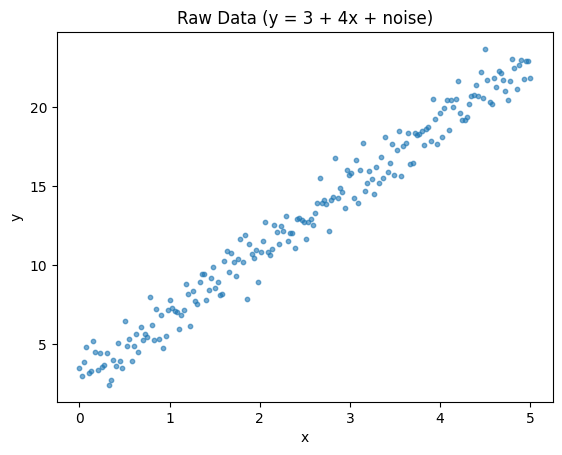

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic dataset
np.random.seed(42)  # for reproducibility
X = np.linspace(0, 5, 200).reshape(-1, 1)
y = 3 + 4 * X + np.random.randn(200, 1)  # y = 3 + 4x + noise

# Add bias column (intercept term)
X_b = np.c_[np.ones((200, 1)), X]

# Plot raw data
plt.scatter(X, y, s=10, alpha=0.6)
plt.title("Raw Data (y = 3 + 4x + noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Closed-form solution (Normal Equation):
Intercept: 2.8452, Slope: 4.0456


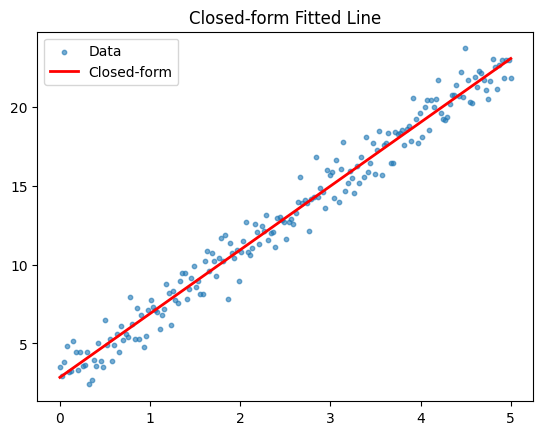

In [ ]:
# 2. Closed-form solution (Normal Equation)
theta_closed = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Closed-form solution (Normal Equation):")
print(f"Intercept: {theta_closed[0][0]:.4f}, Slope: {theta_closed[1][0]:.4f}")

# Plot fitted line (Closed-form)
y_pred_closed = X_b @ theta_closed
plt.scatter(X, y, s=10, alpha=0.6, label="Data")
plt.plot(X, y_pred_closed, "r-", linewidth=2, label="Closed-form")
plt.legend()
plt.title("Closed-form Fitted Line")
plt.show()



Gradient Descent solution:
Intercept: 2.8452, Slope: 4.0456


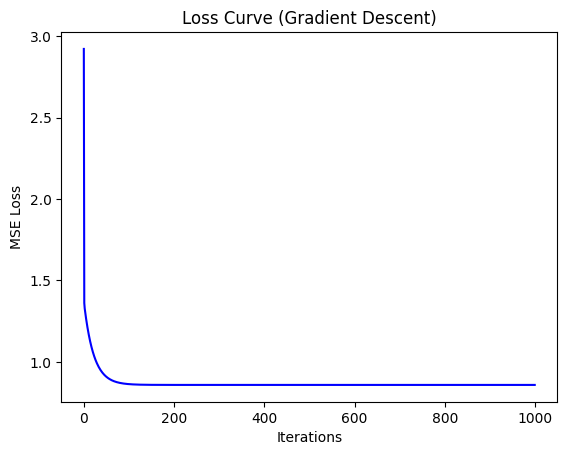

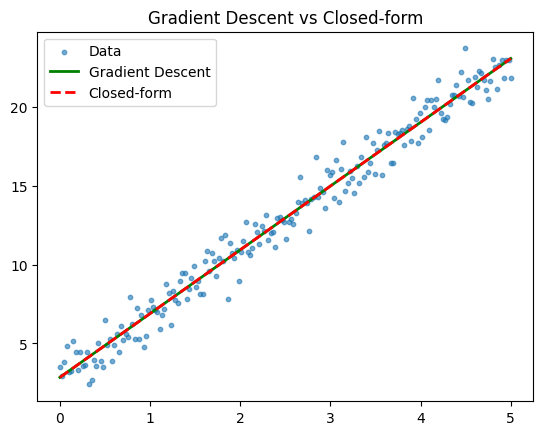

In [ ]:
# 3. Gradient Descent Implementation
def compute_mse(X, y, theta):
    m = len(y)
    return np.mean((X @ theta - y) ** 2)

# Initialize
theta_gd = np.zeros((2, 1))
learning_rate = 0.05
iterations = 1000
m = len(y)
losses = []

for i in range(iterations):
    gradients = (2/m) * X_b.T @ (X_b @ theta_gd - y)
    theta_gd -= learning_rate * gradients
    losses.append(compute_mse(X_b, y, theta_gd))

print("\nGradient Descent solution:")
print(f"Intercept: {theta_gd[0][0]:.4f}, Slope: {theta_gd[1][0]:.4f}")


# Plot loss curve
plt.plot(range(iterations), losses, "b-")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Gradient Descent)")
plt.show()

# Plot fitted line (Gradient Descent)
y_pred_gd = X_b @ theta_gd
plt.scatter(X, y, s=10, alpha=0.6, label="Data")
plt.plot(X, y_pred_gd, "g-", linewidth=2, label="Gradient Descent")
plt.plot(X, y_pred_closed, "r--", linewidth=2, label="Closed-form")
plt.legend()
plt.title("Gradient Descent vs Closed-form")
plt.show()


In [ ]:
# 4. Comparison
print("\nComparison:")
print(f"Closed-form: Intercept={theta_closed[0][0]:.4f}, Slope={theta_closed[1][0]:.4f}")
print(f"Gradient Descent: Intercept={theta_gd[0][0]:.4f}, Slope={theta_gd[1][0]:.4f}")

if np.allclose(theta_closed, theta_gd, atol=0.1):
    print("\n✅ Gradient Descent converged to almost the same solution as the closed-form.")
else:
    print("\n⚠️ Gradient Descent did not fully converge, consider adjusting learning rate or iterations.")


Comparison:
Closed-form: Intercept=2.8452, Slope=4.0456
Gradient Descent: Intercept=2.8452, Slope=4.0456

✅ Gradient Descent converged to almost the same solution as the closed-form.


# Explanation:
Gradient Descent steadily reduced the mean squared error over iterations and converged to nearly the same intercept and slope as the closed-form Normal Equation. The fitted lines overlap closely, confirming both methods reach the same optimal solution. Any tiny difference is due to numerical rounding.